In [1]:
import sys
sys.dont_write_bytecode = True

from modules.convexHull import ConvexHull2D
from modules.line import Line2D
from modules.KDTree import KDTree
from modules.point import Point
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points1 = []
for i in range(100):
    x = np.random.randint(-100, 0)
    y = np.random.randint(-100, 0)
    
    coords = np.array([x, y])

    points1.append(Point(coords))

ch1 = ConvexHull2D(points1, 0, 1)

points2 = []
for i in range(100):
    x = np.random.randint(0, 100)
    y = np.random.randint(0, 100)
    
    coords = np.array([x, y])

    points2.append(Point(coords))

ch2 = ConvexHull2D(points2, 0, 1)

hull1 = ch1.getHull()
hull2 = ch2.getHull()

In [3]:
[(p1, p2), dist] = KDTree.closestPointsSubsets(hull1, hull2)

line = Line2D(0, 1, point1=p1, point2=p2)
pLine = line.perpendicularLine()

print(pLine.areLinearlySeparable(points1, points2))

True


In [4]:
isVertical, verticalCross = pLine.isVertical()

if(isVertical):
    plp1 = Point(np.array([verticalCross, -100]))
    plp2 = Point(np.array([verticalCross, 100]))
else:
    y1 = pLine.equation(-100)
    y2 = pLine.equation(100)
    plp1 = Point(np.array([-100, y1]))
    plp2 = Point(np.array([100, y2]))

(-110.0, 110.0, -108.85, 111.15)

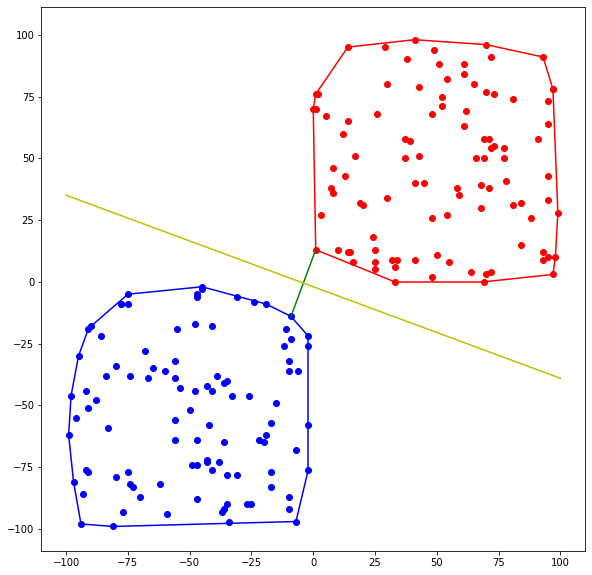

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

for point in points1:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="b")

for point in points2:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="r")
    

for i in range(len(hull1) - 1):
    ax.plot([hull1[i].getCoordinate(0), hull1[i+1].getCoordinate(0)], [hull1[i].getCoordinate(1), hull1[i+1].getCoordinate(1)], color='b')

ax.plot([hull1[len(hull1) - 1].getCoordinate(0), hull1[0].getCoordinate(0)], [hull1[len(hull1) - 1].getCoordinate(1), hull1[0].getCoordinate(1)], color="b")

for i in range(len(hull2) - 1):
    ax.plot([hull2[i].getCoordinate(0), hull2[i+1].getCoordinate(0)], [hull2[i].getCoordinate(1), hull2[i+1].getCoordinate(1)], color='r')

ax.plot([hull2[len(hull2) - 1].getCoordinate(0), hull2[0].getCoordinate(0)], [hull2[len(hull2) - 1].getCoordinate(1), hull2[0].getCoordinate(1)], color="r")


ax.plot([p1.getCoordinate(0), p2.getCoordinate(0)], [p1.getCoordinate(1), p2.getCoordinate(1)], color="g")
ax.plot([plp1.getCoordinate(0), plp2.getCoordinate(0)], [plp1.getCoordinate(1), plp2.getCoordinate(1)], color="y")

ax.axis('square')